Columnas disponibles: Index(['Actual', 'Prediccion'], dtype='object')


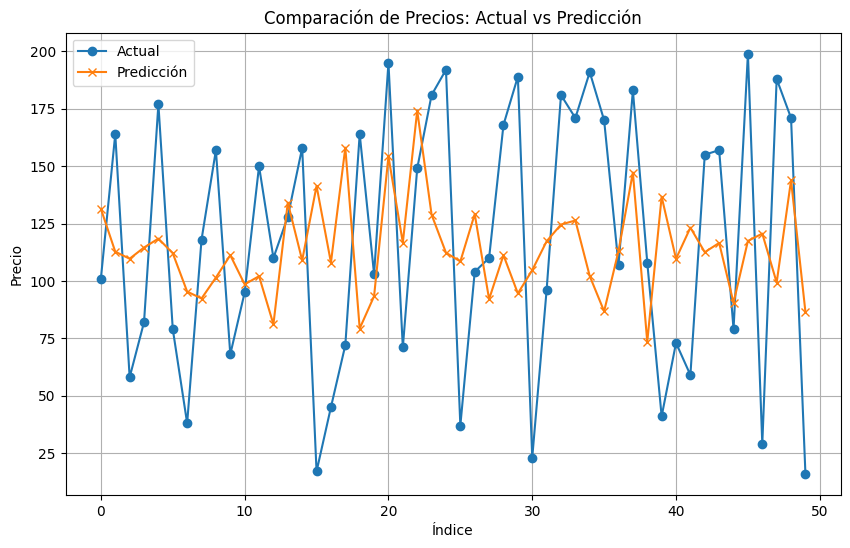

Gráfico guardado en: ../outputs\comparacion_actual_vs_prediccion.png


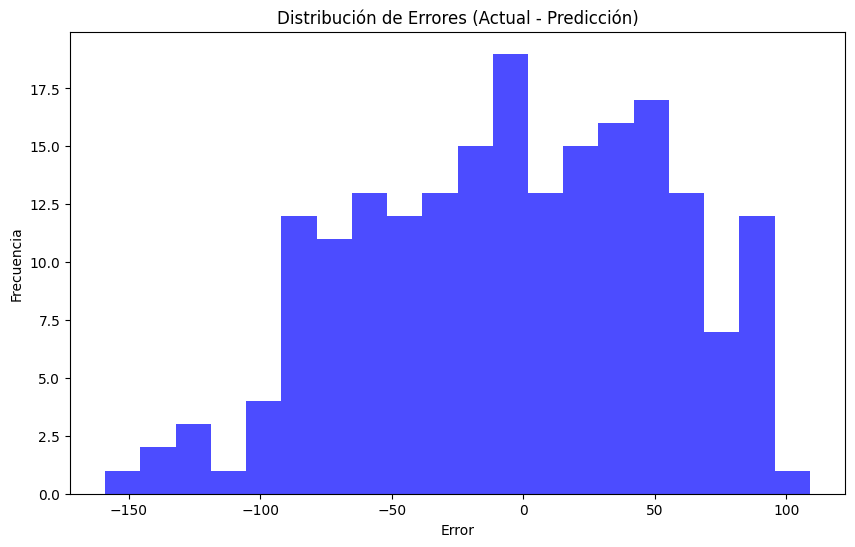

Gráfico guardado en: ../outputs\distribucion_errores.png
MAE: 47.47932551587301
RMSE: 57.255333197870684
Métricas guardadas en: ../outputs\metricas_predicciones.txt


In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import os

# Definir rutas de entrada y salida
input_file = "../outputs/predictions.csv"
output_dir = "../outputs"

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Cargar datos de predicciones
predictions = pd.read_csv(input_file)

# Verificar las columnas disponibles
print("Columnas disponibles:", predictions.columns)

# Comprobación de nombres de columnas
if "Actual" not in predictions.columns or "Prediccion" not in predictions.columns:
    raise KeyError("Las columnas 'Actual' y 'Prediccion' no están presentes en el archivo.")

# Generar gráfico de comparación entre Actual y Predicción
plt.figure(figsize=(10, 6))
plt.plot(predictions["Actual"].values[:50], label="Actual", marker="o")
plt.plot(predictions["Prediccion"].values[:50], label="Predicción", marker="x")
plt.title("Comparación de Precios: Actual vs Predicción")
plt.xlabel("Índice")
plt.ylabel("Precio")
plt.legend()
plt.grid()
output_file1 = os.path.join(output_dir, "comparacion_actual_vs_prediccion.png")
plt.savefig(output_file1)
plt.show()

print(f"Gráfico guardado en: {output_file1}")

# Generar gráfico de distribución de errores
errors = predictions["Actual"] - predictions["Prediccion"]
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color="blue", alpha=0.7)
plt.title("Distribución de Errores (Actual - Predicción)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
output_file2 = os.path.join(output_dir, "distribucion_errores.png")
plt.savefig(output_file2)
plt.show()

print(f"Gráfico guardado en: {output_file2}")

# Métricas de error
mae = abs(errors).mean()  # Error absoluto medio
rmse = (errors ** 2).mean() ** 0.5  # Raíz del error cuadrático medio
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Guardar las métricas en un archivo de texto
metrics_file = os.path.join(output_dir, "metricas_predicciones.txt")
with open(metrics_file, "w") as f:
    f.write(f"MAE: {mae}\n")
    f.write(f"RMSE: {rmse}\n")

print(f"Métricas guardadas en: {metrics_file}")
